In [1]:
import os
import pickle
import numpy as np
from matplotlib import pyplot as plt

os.chdir("../../")
cwd = os.getcwd()
from src.gpdssm.utils import get_random_state

In [2]:
Dx = 2
Dy = 15
N = 10000
X = [[0.0, 0.0]]
Y = []

random_state = get_random_state()
A = random_state.normal(0, 1, (Dy, Dx))
B = random_state.beta(1, 1, (Dy, Dx))
print(A)
print(B)

[[-1.41094505 -0.28032189]
 [-0.03494765 -0.30044379]
 [-1.30650098  1.08115439]
 [-0.16293451 -0.56881247]
 [-0.60694696 -0.61414772]
 [-0.65985294 -0.07313611]
 [-0.03506899 -0.47074184]
 [ 1.72573683  1.56441685]
 [-0.31284528 -1.43760243]
 [-0.00627151 -0.42461477]
 [-0.8945135  -0.68250462]
 [-0.94709728 -0.97086767]
 [-0.10345954  0.49339449]
 [-0.48054342  0.44994435]
 [-0.63466857 -0.24541432]]
[[0.40283811 0.52776081]
 [0.87707396 0.78715454]
 [0.04856194 0.98615305]
 [0.06375284 0.91034949]
 [0.94932778 0.88866369]
 [0.8036379  0.77525846]
 [0.84176781 0.06024011]
 [0.13641323 0.35125258]
 [0.95057436 0.07921395]
 [0.5208154  0.63292241]
 [0.58951191 0.57725173]
 [0.5220166  0.98525997]
 [0.6715595  0.36625659]
 [0.81886102 0.41442334]
 [0.73857791 0.64453103]]


In [3]:
def x_process(x):
    x_next_1 = 0.9 * x[0] + 0.5 * np.sin(x[1]) + random_state.normal(0., 1.0e-2)
    x_next_2 = 0.5 * np.cos(x[0]) + 0.9 * x[1] + random_state.normal(0., 1.0e-2)
    return [x_next_1, x_next_2]

def generate_x_process(T):
    for t in range(T):
        x_next = x_process(X[-1])
        X.append(x_next)

In [4]:
generate_x_process(N)
X = np.array(X)

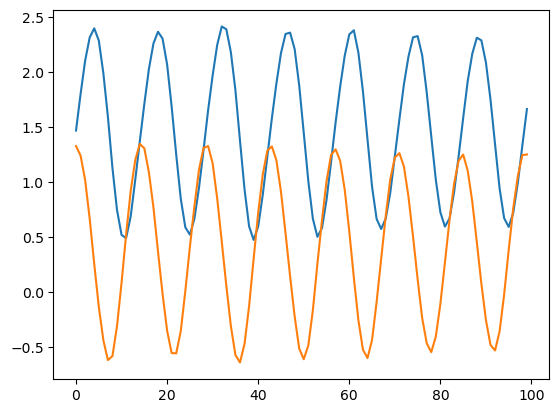

In [5]:
plt.plot(X[-100:, :])
plt.savefig(os.path.join(cwd, "plots", "case2", "x1.png"))

In [6]:
def y_process(x):
    y = 0.5 * np.dot(A, x) + np.sin(np.dot(B, x)) + np.random.normal(0., 0.01, Dy)
    return y

def generate_y_process(T):
    for t in range(T):
        y_next = y_process(X[t+1])
        Y.append(y_next)

In [7]:
generate_y_process(N)
Y = np.array(Y)

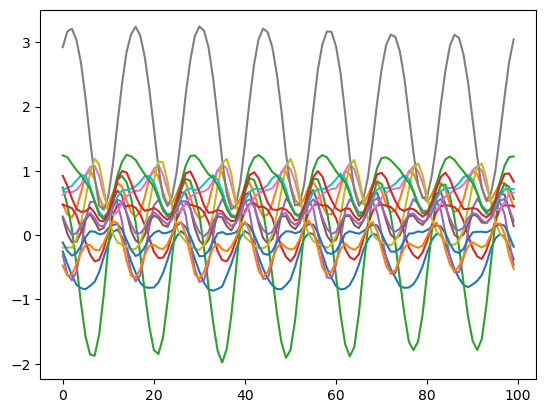

In [8]:
plt.plot(Y[-100:, :])
plt.savefig(os.path.join(cwd, "plots", "case2", "y1.png"))

In [9]:
cwd = os.getcwd()
Y_path = os.path.join(cwd, "folds", "train_2_fold_1_Y.txt")
np.savetxt(Y_path, Y)

In [10]:
X_path = os.path.join(cwd, "folds", "train_2_fold_1_X.pickle")
with open(X_path, 'wb') as f:
    pickle.dump([X], f)

In [11]:
# cwd = os.getcwd()
# X_path = os.path.join(cwd, "folds", "%s_fold_%s_X.pickle" % ('x2y3', 1)) #os.path.join(cwd, "folds", "x2y3_fold_1_X.pickle")
# with open(X_path, 'rb') as f:
#     X_test = pickle.load(f)